In [1]:
import os
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostRegressor, CatBoostClassifier

In [3]:
df = pd.read_csv("/home/riri/Desktop/Soiling/datasets/soiling.csv")
df.head()

,client,gender,age,hours_slept,sleep_quality,main_food_taken,food_taken_amount,drink,temperature(deg),exercise,medication,breakfast_time,lunch_time,supper_time,visit_restroom,times_visited,avg_relieve_time(min),soiled
0,Alexander,Male,6,6,Good,Rice,Heavy,Water,27.4,No,No,09:45,13:41,19:38,No,0,15,No
1,Pauline,Female,7,8,Excellent,Meat,Heavy,Water,16.1,No,Yes,09:32,13:16,18:44,No,0,27,No
2,Cartwright,Male,12,6,Good,Veggies,Normal,Coffee,24.5,No,Yes,09:32,13:01,18:25,No,0,53,No
3,O'Connor-Cunningham,Male,8,6,Good,Githeri,Normal,Porridge,25.5,No,Yes,08:59,12:34,18:46,No,0,52,No
4,Walker,Female,7,6,Good,Veggies,Small,Tea,20.0,No,No,09:25,13:21,19:18,No,0,30,Yes


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,28532.0,7.985981,2.011258,0.0,7.0,8.0,9.0,16.0
hours_slept,28532.0,6.991658,1.042506,3.0,6.0,7.0,8.0,11.0
temperature(deg),28532.0,18.491865,3.524966,1.2,16.1,18.5,20.9,32.8
times_visited,28532.0,1.498283,1.809482,0.0,0.0,0.0,3.0,5.0
avg_relieve_time(min),28532.0,37.490537,13.269377,15.0,26.0,38.0,49.0,60.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28532 entries, 0 to 28531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client                 28532 non-null  object 
 1   gender                 28532 non-null  object 
 2   age                    28532 non-null  int64  
 3   hours_slept            28532 non-null  int64  
 4   sleep_quality          28532 non-null  object 
 5   main_food_taken        28532 non-null  object 
 6   food_taken_amount      28532 non-null  object 
 7   drink                  28532 non-null  object 
 8   temperature(deg)       28532 non-null  float64
 9   exercise               28532 non-null  object 
 10  medication             28532 non-null  object 
 11  breakfast_time         28532 non-null  object 
 12  lunch_time             28532 non-null  object 
 13  supper_time            28532 non-null  object 
 14  visit_restroom         28532 non-null  object 
 15  ti

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_44020/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


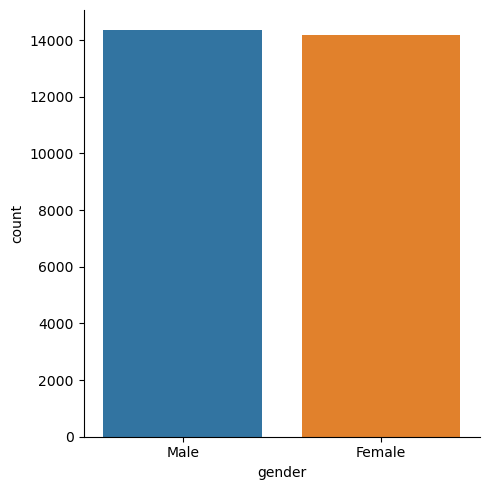

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_44020/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


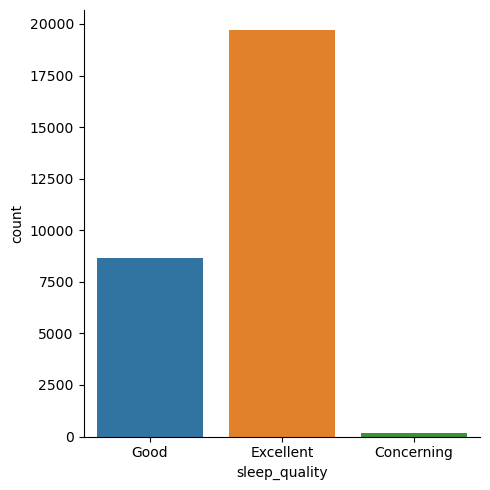

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_44020/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


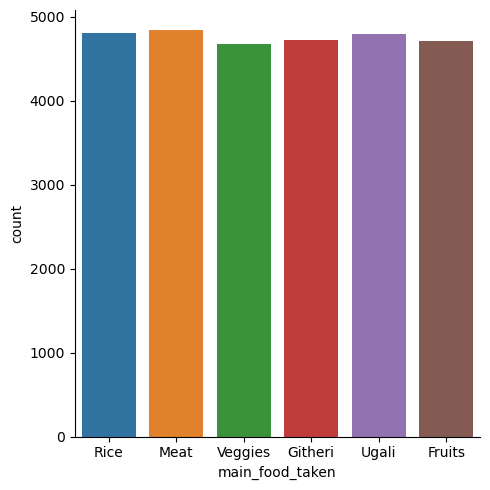

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_44020/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


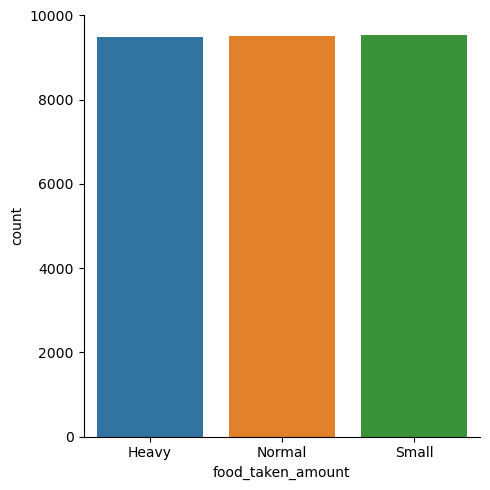

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_44020/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


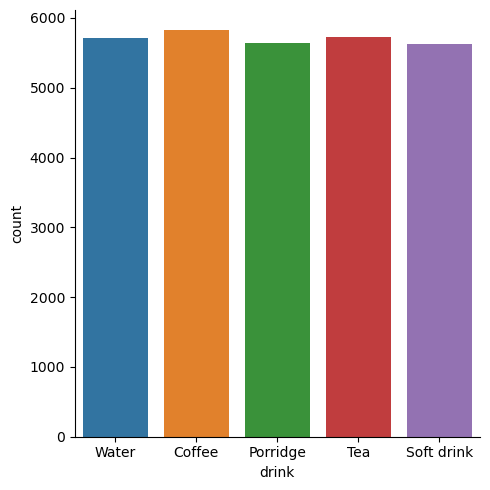

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_44020/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


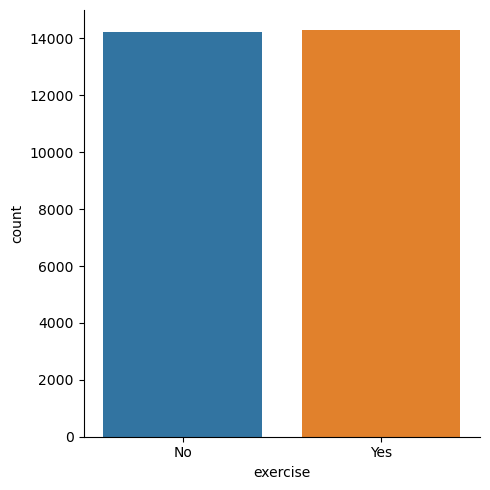

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_44020/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


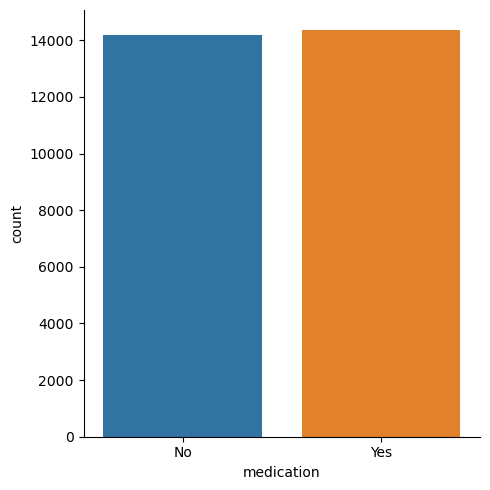

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_44020/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


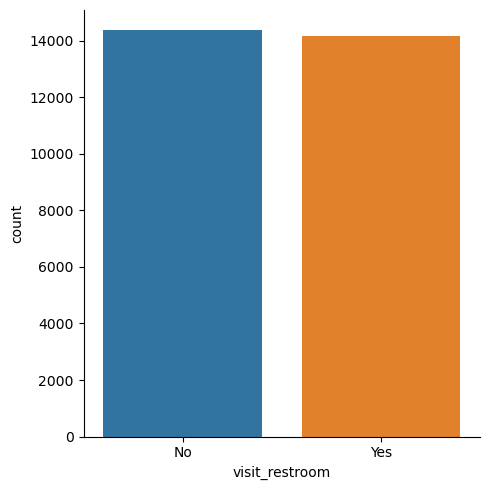

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_44020/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


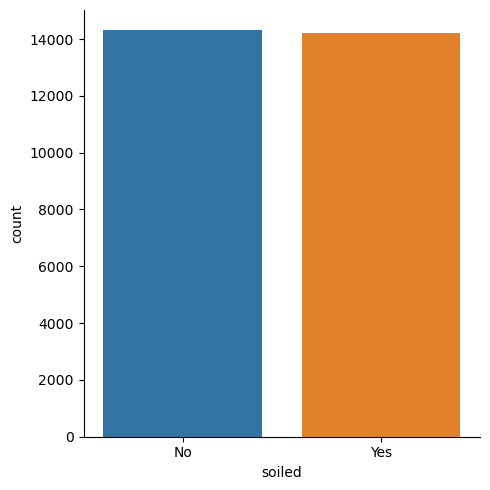

In [6]:
for col in df.select_dtypes(include=['object', 'category']):
    if col not in ['client', 'breakfast_time', 'lunch_time', 'supper_time']:
        sns.catplot(data=df, x=col, kind="count")
        plt.tight_layout()
        plt.show();

In [7]:
df.drop(columns=['client', 'soiled'])

for col in df.select_dtypes(include=['object']):
    if col not in ('client', 'soiled'):
        ct = pd.crosstab(df['soiled'], df[col])
        chi, p_value, dof, expected = chi2_contingency(ct) 
        if p_value <= 0.05:
            hypo = "Reject"
        else:
            hypo = "Accept"
            
        print(f"************** {str(col).replace('_', ' ').title()}: {df[col].nunique()} **************")
        print(f"chi: {chi:.5f}\np-value: {p_value:.5f}\nDegree: {dof}\nNull Hypothesis: {hypo}\n")

************** Gender: 2 **************
chi: 1.06637
p-value: 0.30177
Degree: 1
Null Hypothesis: Accept

************** Sleep Quality: 3 **************
chi: 0.62174
p-value: 0.73281
Degree: 2
Null Hypothesis: Accept

************** Main Food Taken: 6 **************
chi: 0.81839
p-value: 0.97585
Degree: 5
Null Hypothesis: Accept

************** Food Taken Amount: 3 **************
chi: 0.97520
p-value: 0.61410
Degree: 2
Null Hypothesis: Accept

************** Drink: 5 **************
chi: 2.72952
p-value: 0.60406
Degree: 4
Null Hypothesis: Accept

************** Exercise: 2 **************
chi: 4.24167
p-value: 0.03944
Degree: 1
Null Hypothesis: Reject

************** Medication: 2 **************
chi: 2.47101
p-value: 0.11596
Degree: 1
Null Hypothesis: Accept

************** Breakfast Time: 121 **************
chi: 110.13878
p-value: 0.72957
Degree: 120
Null Hypothesis: Accept

************** Lunch Time: 91 **************
chi: 78.83707
p-value: 0.79358
Degree: 90
Null Hypothesis: Accept

**

In [8]:
df.duplicated(subset=['client', 'age', 'gender']).sum()

14568

In [9]:
df.rename({'avg_relieve_time(min)': 'time' }, axis=1, inplace=True)
data = df.drop_duplicates(keep='first')

X = data.drop(columns=['client', 'breakfast_time', 'lunch_time', 'supper_time', 'soiled', 'time'], axis=1)
y1 = data['soiled']
y2 = data['time']

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


def preprocess_inputs(data: pd.DataFrame):
    cat_columns = [col for col in data.select_dtypes(include=['object', 'category'])]
    num_columns = [col for col in data.select_dtypes(include=['int', 'float'])]
    
    cat_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(sparse_output=False))
    ])
    
    num_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ])  
        
    transformer = ColumnTransformer(transformers=[
        ("categorical", cat_pipe, cat_columns),
        ("numerical", num_pipe, num_columns)
    ])
    
    preprocessed = transformer.fit_transform(data)
    
    return preprocessed

In [11]:
le = LabelEncoder()
y1 = le.fit_transform(y1)
new_x = preprocess_inputs(X)

X_train, X_test, y_train, y_test = train_test_split(new_x, y1, test_size=0.33, random_state=42)

In [12]:
X_train.shape, X_test.shape, y_train.shape

((19116, 29), (9416, 29), (19116,))

In [13]:
from sklearn.base import ClassifierMixin
from sklearn.model_selection import StratifiedKFold
import numpy as np

def run_classifier(model, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray):
    scores = []
    
    # kfold = StratifiedKFold()
    
    # for (train_idx, val_idx) in enumerate(kfold.split(X, y)):
    #     X_train, X_test = X[train_idx], 
        
        
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    
    return score

In [14]:
lr = LogisticRegression()
run_classifier(lr, X_train, y_train, X_test, y_test)

0.489910790144435

In [15]:
xgb = XGBClassifier()
run_classifier(xgb, X_train, y_train, X_test, y_test)

0.5056287170773152

In [16]:
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [17]:
xgb.score(X_train, y_train)

0.7314291692822766

In [18]:
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

          No       0.51      0.53      0.52      4718
         Yes       0.50      0.49      0.49      4698

    accuracy                           0.51      9416
   macro avg       0.51      0.51      0.51      9416
weighted avg       0.51      0.51      0.51      9416



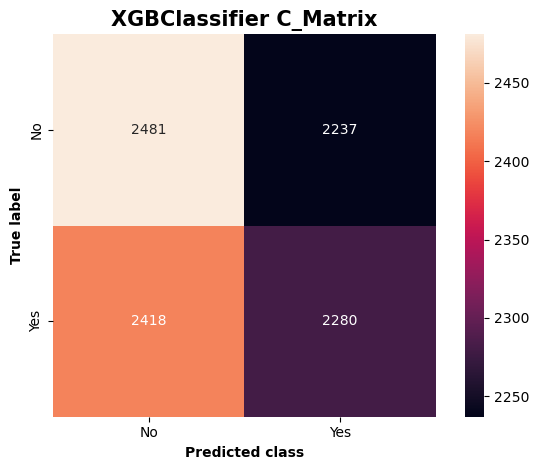

In [19]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, square=True, cbar=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("XGBClassifier C_Matrix", weight='bold', size=15)
plt.xlabel("Predicted class", weight="bold", size=10)
plt.ylabel("True label", weight='bold', size=10)
plt.tight_layout()
plt.show();

In [20]:
DIR = '..'
MODELS_DIR = os.path.join(DIR, 'models')
os.makedirs(MODELS_DIR, exist_ok=True)

xgb_path = os.path.join(MODELS_DIR, 'xgb.pkl')
with open(xgb_path, 'wb') as file:
    pickle.dump(xgb, file, protocol=pickle.HIGHEST_PROTOCOL)

In [21]:
with open(xgb_path, 'rb') as file:
    model = pickle.load(file)

model.score(X_train, y_train)

0.7314291692822766

- Regressor

In [22]:
X_train, X_test, y_train, y_test = train_test_split(new_x, y2, test_size=0.33, random_state=42)

In [23]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=600, 
                  max_depth=6,
                  learning_rate=0.001,
                  verbosity=0, 
                  random_state=42)

reg.fit(X_train, y_train)

reg.score(X_train, y_train)

-2.3509566772620905

In [24]:
reg.score(X_test, y_test)

-2.3053122317072727

In [25]:
reg.predict(X_test[:6])

array([17.974192, 17.482012, 17.446781, 17.196257, 17.183447, 17.62898 ],
      dtype=float32)

### CatBoost.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.33, random_state=42)

In [27]:
cat = CatBoostClassifier(iterations=1000, learning_rate=0.001, depth=5, random_state=42)
cats = [ col for col in X.select_dtypes(include=['object', 'category'])]

In [29]:
cat.fit(X_train, 
        y_train,
        cat_features=cats,
        eval_set=[(X_test, y_test)],
        verbose=0)

In [30]:
cat.score(X_train, y_train)

0.5044988491316175

In [31]:
cat.score(X_test, y_test)

0.4871495327102804

In [32]:
cat.predict(X_test[:5])

array([1, 0, 1, 1, 1])

In [33]:
cat.predict_proba(X_test[:5])

array([[0.49999714, 0.50000286],
       [0.50000619, 0.49999381],
       [0.49999714, 0.50000286],
       [0.49999714, 0.50000286],
       [0.49999714, 0.50000286]])

In [34]:
labels = {0: 'No', 1: 'Yes'}

In [35]:
np.max(cat.predict_proba(X_test[:1]).round(4) * 100)

50.0

In [36]:
cat_path = os.path.join(MODELS_DIR, 'catboost.pkl')
with open(cat_path, 'wb') as file:
    pickle.dump(cat, file, protocol=pickle.HIGHEST_PROTOCOL)

- Regressor

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.33, random_state=42)

In [38]:
catReg =  CatBoostRegressor(iterations=1000, learning_rate=0.001, depth=5, random_state=42)

catReg.fit(X_train, y_train,
          cat_features=cats,
          eval_set=[(X_test, y_test)],
          verbose=0)

In [39]:
catReg.score(X_train, y_train)

1.3750027594294778e-06

In [40]:
catReg.score(X_test, y_test)

-4.301598243117155e-05

In [41]:
reg_path = os.path.join(MODELS_DIR, 'catReg.pkl')
with open(reg_path, 'wb') as file:
    pickle.dump(catReg, file, protocol=pickle.HIGHEST_PROTOCOL)

In [42]:
catReg.predict(X_test[:5])

array([37.51929079, 37.51929079, 37.52007014, 37.51929079, 37.51977362])

In [51]:
print(os.path.dirname(os.path.abspath(__name__)))

/home/riri/Desktop/Soiling/src/notebooks
